In [2]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_losses_from_files(model_name,train_loss_file,val_loss_file,start,plot_title="LSTM Performance"):
    T = pd.read_csv(train_loss_file)
    V = pd.read_csv(val_loss_file)
    
    #print(list(T['loss']))
    #print(V['loss'])
    
    y = range(len(T))
    train_loss = list(T['loss'])
    val_loss = list(V['loss'])
    #val_loss = val_loss[1:]
    
    if len(val_loss) < len(train_loss) and val_loss:
        val_loss.append(val_loss[-1])
    
    if train_loss:
        plt.plot(y[start:],train_loss[start:])
    if val_loss:
        plt.plot(y[start:],val_loss[start:])
        
    plt.legend(["train loss", "validation loss"])
    plt.xlabel("# of minibatches")
    plt.ylabel("loss value")
    plt.title(plot_title)
    plt.savefig("./output/{}/{}.png".format(model_name,"losses_plot"), dpi=80)
    plt.show()
    

def plot_lossed_from_df(model_name,V,T,start):
    y = T['minibatch']
    train_loss = list(T['loss'])
    val_loss = list(V['loss'])
    #val_loss = val_loss[1:]
    
    if len(val_loss) < len(train_loss) and val_loss:
        val_loss.append(val_loss[-1])
    
    if train_loss:
        plt.plot(y[start:],train_loss[start:])
    if val_loss:
        plt.plot(y[start:],val_loss[start:])
    plt.legend(["train loss", "validation loss"])
    plt.xlabel("# of minibatches")
    plt.ylabel("loss value")
    plt.title("Performance of the Custom Model")
    plt.show()
    

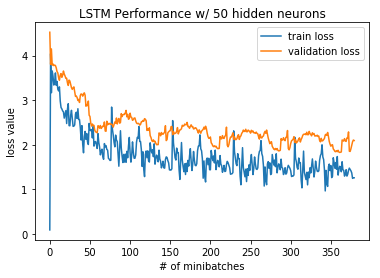

In [4]:
model_name="lstm75"
val_loss_file = "./output/{}/validation_loss.csv".format(model_name)
train_loss_file = "./output/{}/train_loss.csv".format(model_name)
scores_file = "./output/{}/scores.csv".format(model_name)

plot_losses_from_files(model_name,train_loss_file,val_loss_file,0,plot_title="LSTM Performance w/ 50 hidden neurons")